# End-to-End Flipkart E-Commerce Sales Analytics & Prediction System

## Project Overview
This project is a **complete end-to-end data analysis, machine learning, and deep learning system** built on Flipkart-style e-commerce data.  
It covers the full data science lifecycle — from raw data loading to statistical analysis, advanced visualizations, predictive modeling, and model persistence.

The goal is to **analyze sales behavior**, understand key business drivers, and **predict product sales** using both traditional machine learning and deep learning models.

---

## Dataset Description
The dataset contains **10,000 rows** of realistic Flipkart-like e-commerce data.

### Columns
- `product_id` – Unique product identifier  
- `product_name` – Name of the product  
- `category` – Product category  
- `brand` – Brand name  
- `price` – Product price  
- `discount_percent` – Discount offered  
- `rating` – Customer rating (1–5)  
- `reviews_count` – Number of customer reviews  
- `sales` – Sales volume (target variable)

---

## Project Architecture


Upload your Flipkart CSV file


Saving flipkart_ecommerce_10000_rows.csv to flipkart_ecommerce_10000_rows (1).csv


,product_id,product_name,category,brand,price,discount_percent,rating,reviews_count,sales
0,FKP00001,Product_1,Books,Dell,31359,48,4.4,103,289
1,FKP00002,Product_2,Home & Kitchen,Puma,43972,60,2.2,4944,3111
2,FKP00003,Product_3,Fashion,LG,4855,37,1.4,2442,1963
3,FKP00004,Product_4,Sports,Boat,47838,15,4.6,4966,4489
4,FKP00005,Product_5,Fashion,Philips,56513,13,1.6,2573,4023


Shape: (10000, 9)


,price,discount_percent,rating,reviews_count,sales
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40143.206900,35.017100,3.008320,2521.417600,2487.002400
std,23144.818787,20.525928,1.155316,1445.593745,1436.554331
min,303.000000,0.000000,1.000000,0.000000,10.000000
25%,20260.750000,17.000000,2.000000,1283.000000,1251.750000
50%,40009.000000,35.000000,3.000000,2533.500000,2482.000000
75%,60450.500000,53.000000,4.000000,3767.250000,3722.250000
max,79990.000000,70.000000,5.000000,5000.000000,5000.000000


Shapiro Test (Sales): ShapiroResult(statistic=np.float64(0.9536088651205977), pvalue=np.float64(1.9893308314383645e-11))
Pearson Correlation (Price vs Sales): PearsonRResult(statistic=np.float64(-0.004205658980780299), pvalue=np.float64(0.6741091395928915))


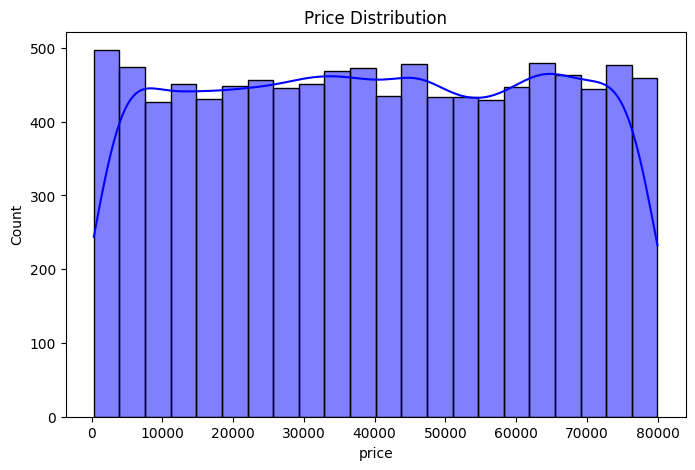

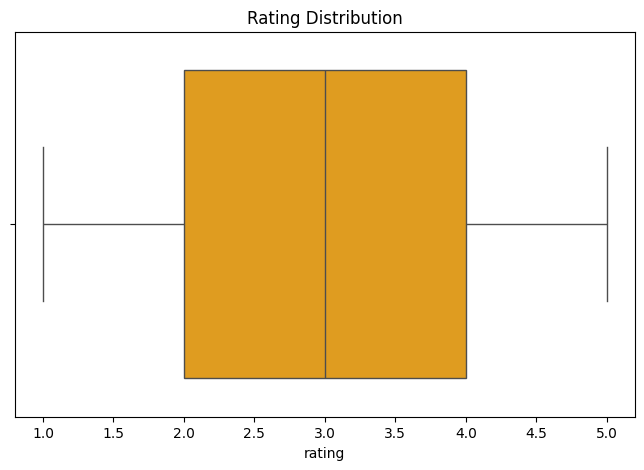

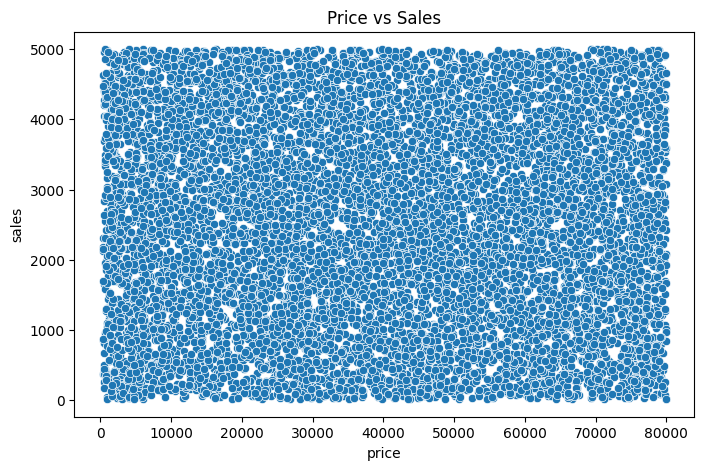

LR RMSE: 1419.461518107601
RF RMSE: 1441.0347911293381
Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8256317.0000 - val_loss: 8188577.5000
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7375273.5000 - val_loss: 5751280.0000
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4787519.5000 - val_loss: 2893367.2500
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2525020.2500 - val_loss: 2206810.0000
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2077023.7500 - val_loss: 2167062.7500
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2073282.8750 - val_loss: 2162184.0000
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2087284.0000 - val_loss: 2158360.2500
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2094736.5000 - val_loss: 2157103.7500
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2077886.7500 - val_loss: 2153948.5000
Epoch 10/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20

In [7]:
# FORCE VISUAL OUTPUT IN COLAB
%matplotlib inline

# INSTALL LIBRARIES
!pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn tensorflow joblib

# IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
pio.renderers.default = "colab"

import plotly.express as px
import plotly.graph_objects as go

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import joblib
import warnings
warnings.filterwarnings("ignore")

from google.colab import files


# UPLOAD CSV
print("Upload your Flipkart CSV file")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

display(df.head())


# BASIC INFO
print("Shape:", df.shape)
display(df.describe())


# CLEANING
df.drop_duplicates(inplace=True)
df.fillna(method="ffill", inplace=True)


# STATISTICS
print("Shapiro Test (Sales):", stats.shapiro(df["sales"].sample(500)))
print("Pearson Correlation (Price vs Sales):", stats.pearsonr(df["price"], df["sales"]))


# MATPLOTLIB + SEABORN VISUALS (STATIC)
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True, color="blue")
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df["rating"], color="orange")
plt.title("Rating Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["price"], y=df["sales"])
plt.title("Price vs Sales")
plt.show()


# PLOTLY INTERACTIVE VISUALS
fig = px.bar(df, x="category", y="sales", color="category",
             title="Sales by Category")
fig.show()

fig = px.histogram(df, x="price", nbins=40,
                   title="Interactive Price Distribution")
fig.show()

fig = px.scatter(df, x="price", y="rating",
                 size="sales", color="category",
                 title="Rating vs Price (Bubble = Sales)")
fig.show()

fig = px.scatter(df, x="discount_percent", y="sales",
                 trendline="ols",
                 title="Discount Impact on Sales")
fig.show()

corr = df[["price","discount_percent","rating","reviews_count","sales"]].corr()
fig = go.Figure(go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale="Viridis"
))
fig.update_layout(title="Correlation Heatmap")
fig.show()


# FEATURE ENGINEERING
le_cat = LabelEncoder()
le_brand = LabelEncoder()

df["category"] = le_cat.fit_transform(df["category"])
df["brand"] = le_brand.fit_transform(df["brand"])

X = df[["price","discount_percent","rating","reviews_count","category","brand"]]
y = df["sales"]

scaler = StandardScaler()
X = scaler.fit_transform(X)


# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# MACHINE LEARNING
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=200).fit(X_train, y_train)

print("LR RMSE:", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))


# DEEP LEARNING
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

print("DL RMSE:",
      np.sqrt(mean_squared_error(y_test, model.predict(X_test).flatten())))


# SAVE MODEL
joblib.dump(rf, "best_flipkart_model.pkl")
print("Model saved")

print("END-TO-END ANALYSIS COMPLETED")
